<a href="https://colab.research.google.com/github/NAMHUBB/Nam/blob/main/251127.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("GPU:", tf.config.list_physical_devices('GPU'))
# GPU check

TensorFlow version: 2.19.0
GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
import tensorflow as tf

# MNIST 데이터셋 로드
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 0~255 → 0~1로 정규화
x_train = x_train / 255.0
x_test = x_test / 255.0


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# 간단한 신경망 모델 정의
# Dense Layer를 이용한 기본적인 분류 모델

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.fit(x_train, y_train, epochs=3)
# 모델 학습


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8751 - loss: 0.4363
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9639 - loss: 0.1195
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9751 - loss: 0.0787


In [ ]:
model.evaluate(x_test, y_test, verbose=2)
# 테스트 데이터로 평가

313/313 - 2s - 5ms/step - accuracy: 0.9739 - loss: 0.0811


[0.0811278447508812, 0.9739000201225281]

In [ ]:
import numpy as np

# 테스트셋 첫 이미지 예측
img = x_test[0]
prediction = model.predict(img.reshape(1, 28, 28))

print("예측:", np.argmax(prediction))
print("실제 정답:", y_test[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
예측: 7
실제 정답: 7


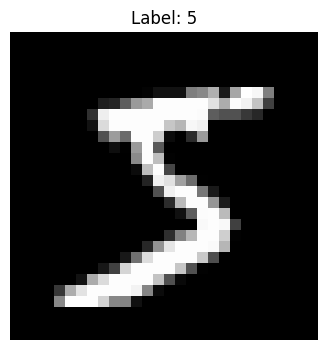

In [ ]:
# MNIST 이미지 시각화 (Matplotlib)

import tensorflow as tf
import matplotlib.pyplot as plt

# MNIST 로드
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 첫 번째 이미지 선택
image = x_train[0]
label = y_train[0]

plt.figure(figsize=(4,4))
plt.imshow(image, cmap='gray')  # 흑백 이미지 표시
plt.title(f"Label: {label}")
plt.axis('off')
plt.show()




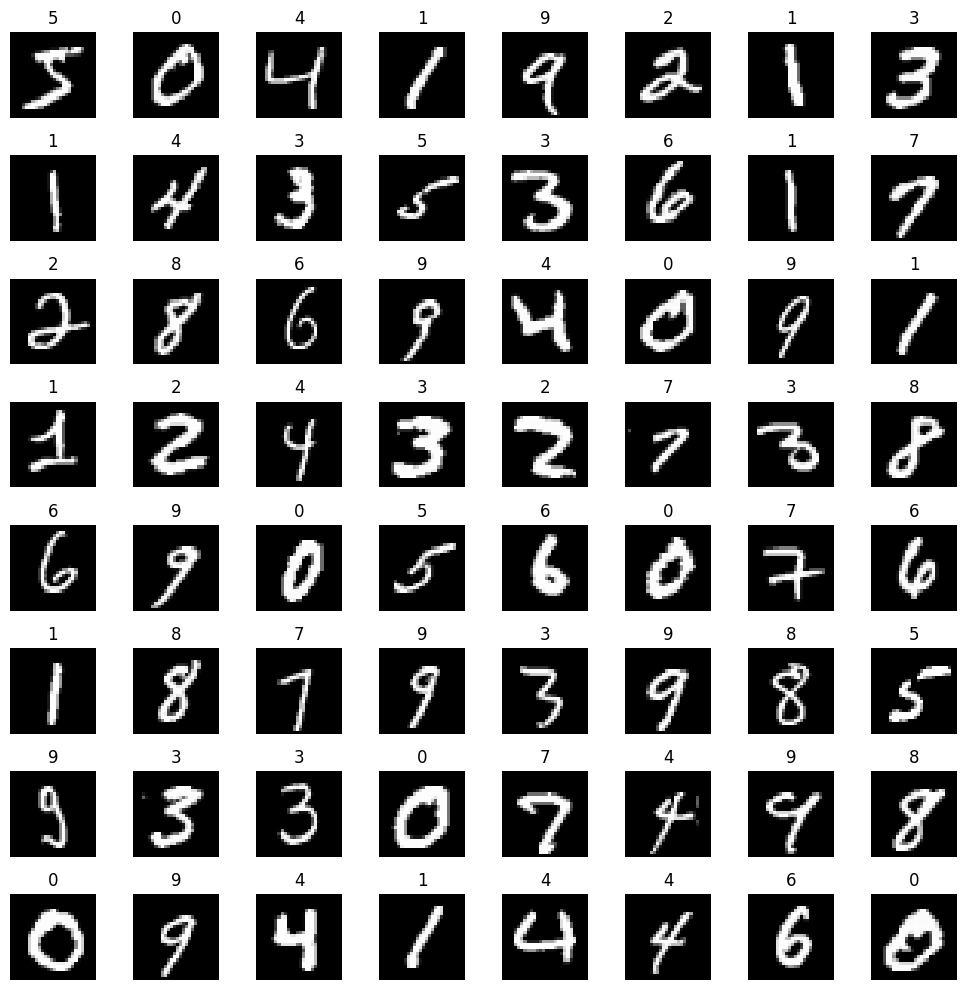

In [ ]:
# 여러 장을 한 번에 시각화

import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

for i in range(64):
    plt.subplot(8,8,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
print("x_train shape:", x_train.shape)  # (60000, 28, 28)
print("y_train shape:", y_train.shape)  # (60000,)
print("픽셀 값 범위:", x_train.min(), "~", x_train.max())


x_train shape: (60000, 28, 28)
y_train shape: (60000,)
픽셀 값 범위: 0 ~ 255


In [ ]:
# MNIST 불러오기 + CNN용 reshape

import tensorflow as tf
import matplotlib.pyplot as plt

# MNIST 로드
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# CNN 입력 형태로 reshape
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

print("변환 전:", x_train.shape)       # (60000, 28, 28)
print("변환 후:", x_train_cnn.shape)  # (60000, 28, 28, 1)


변환 전: (60000, 28, 28)
변환 후: (60000, 28, 28, 1)


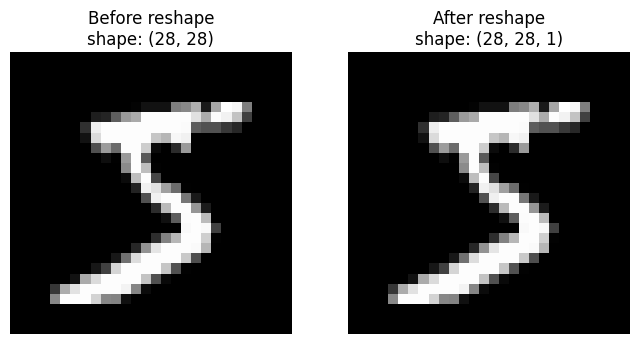

In [ ]:
# reshape 전/후 이미지 시각적 비교

import numpy as np
plt.figure(figsize=(8,4))

# 원본
plt.subplot(1,2,1)
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Before reshape\nshape: {x_train[0].shape}")
plt.axis('off')

# reshape 후 (채널 1 추가)
plt.subplot(1,2,2)
plt.imshow(x_train_cnn[0].reshape(28,28), cmap='gray')
plt.title(f"After reshape\nshape: {x_train_cnn[0].shape}")
plt.axis('off')

plt.show()


In [ ]:
# reshape 후 실제 내부 데이터 구조 확인

print("한 이미지의 원본 shape:", x_train[0].shape)
print("한 이미지의 CNN shape:", x_train_cnn[0].shape)
print("CNN 이미지 한 픽셀 값:", x_train_cnn[0][14][14][0])


한 이미지의 원본 shape: (28, 28)
한 이미지의 CNN shape: (28, 28, 1)
CNN 이미지 한 픽셀 값: 240


In [ ]:
# MNIST 로드 + CNN 입력 형태로 변환

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), _ = tf.keras.datasets.mnist.load_data()
x = x_train[0] / 255.0  # 정규화
x_input = x.reshape(1, 28, 28, 1)  # CNN 입력 형태


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


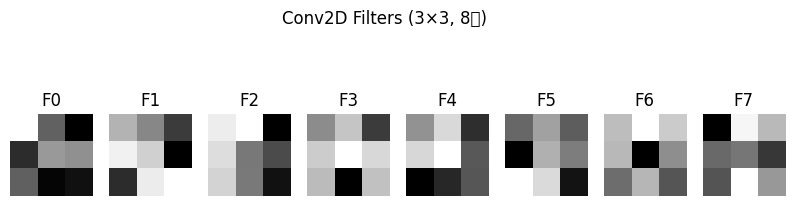

In [ ]:
# Conv2D 필터 시각화

from tensorflow.keras.layers import Conv2D

conv = Conv2D(filters=8, kernel_size=(3,3), activation=None)
conv.build((None, 28, 28, 1))
filters = conv.get_weights()[0]

plt.figure(figsize=(10,3))
for i in range(8):
    plt.subplot(1, 8, i+1)
    plt.imshow(filters[:,:,0,i], cmap='gray')
    plt.title(f"F{i}")
    plt.axis('off')

plt.suptitle("Conv2D Filters (3×3, 8개)")
plt.show()


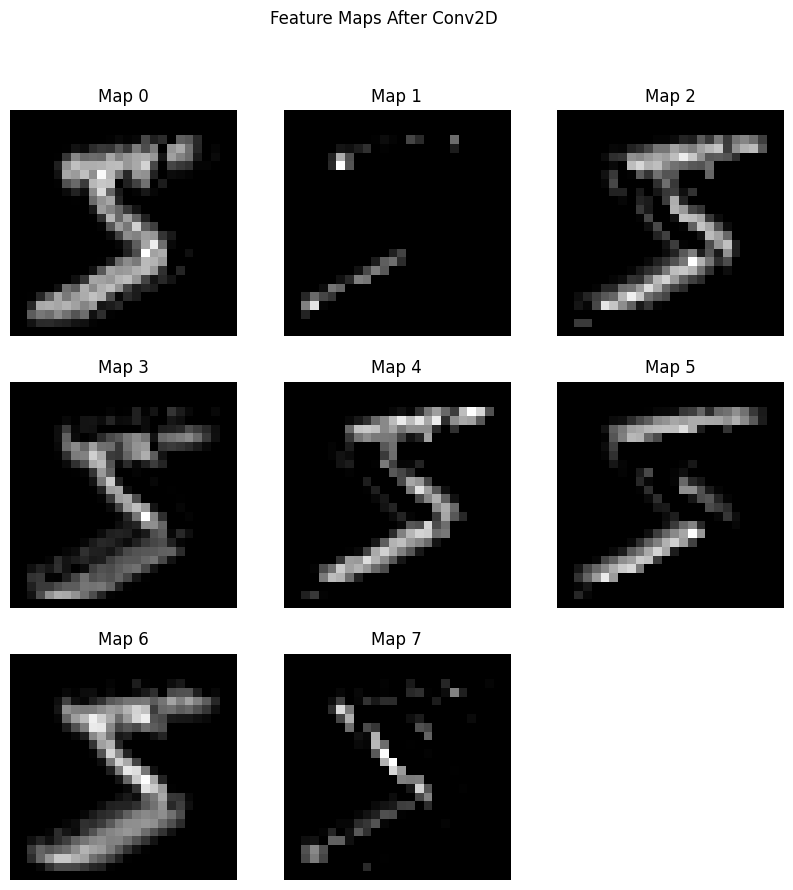

In [ ]:
# CNN 통과 “전/후” feature map 시각화

model = tf.keras.Sequential([
    Conv2D(8, (3,3), activation='relu')
])

feature_maps = model(x_input)

plt.figure(figsize=(10,10))
for i in range(8):
    plt.subplot(3,3,i+1)
    plt.imshow(feature_maps[0,:,:,i], cmap='gray')
    plt.title(f"Map {i}")
    plt.axis('off')
plt.suptitle("Feature Maps After Conv2D")
plt.show()




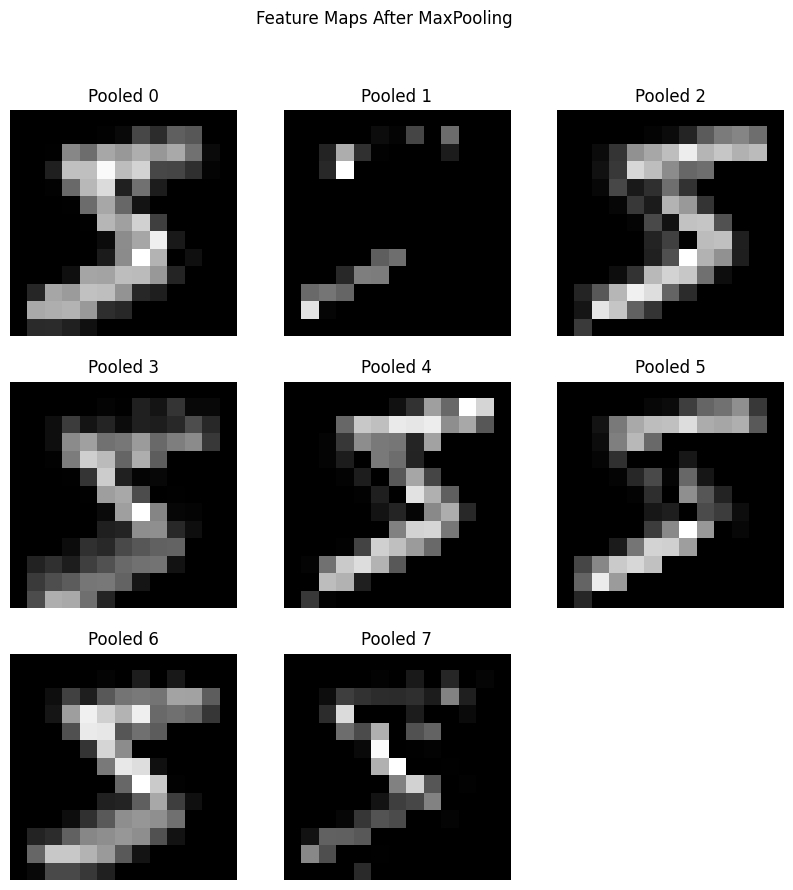

In [ ]:
# Pooling 동작 시각화 (MaxPooling2D)

from tensorflow.keras.layers import MaxPooling2D

pool = MaxPooling2D(pool_size=(2,2))
pooled = pool(feature_maps)

plt.figure(figsize=(10,10))
for i in range(8):
    plt.subplot(3,3,i+1)
    plt.imshow(pooled[0,:,:,i], cmap='gray')
    plt.title(f"Pooled {i}")
    plt.axis('off')

plt.suptitle("Feature Maps After MaxPooling")
plt.show()





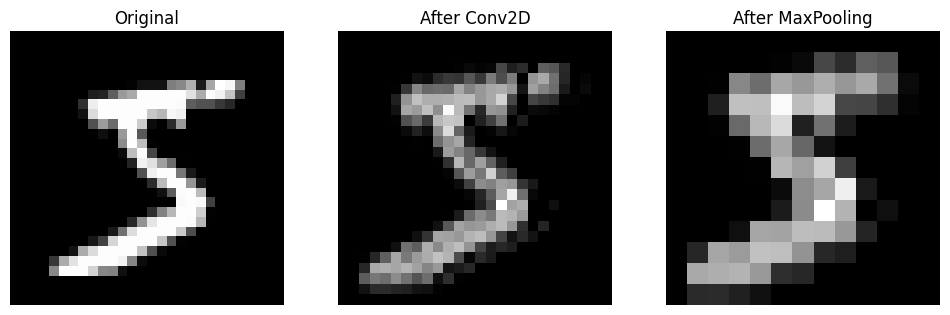

In [ ]:

# 전체 흐름 요약 시각화

plt.figure(figsize=(12, 4))

# 원본
plt.subplot(1,3,1)
plt.imshow(x, cmap='gray')
plt.title("Original")
plt.axis('off')

# Conv feature map (첫 번째 필터)
plt.subplot(1,3,2)
plt.imshow(feature_maps[0,:,:,0], cmap='gray')
plt.title("After Conv2D")
plt.axis('off')

# Pooling
plt.subplot(1,3,3)
plt.imshow(pooled[0,:,:,0], cmap='gray')
plt.title("After MaxPooling")
plt.axis('off')

plt.show()


5877905/5877905 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


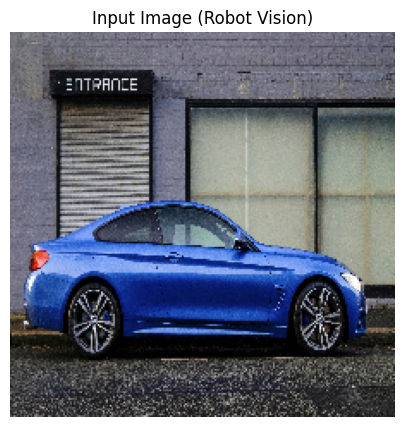

In [ ]:
# 샘플 로봇 비전용 이미지 내려받기

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# 샘플 이미지 다운로드
image_path = tf.keras.utils.get_file(
    "sample.jpg",
    "https://images.unsplash.com/photo-1502877338535-766e1452684a"
)

img = tf.keras.utils.load_img(image_path, target_size=(224, 224))
img_arr = tf.keras.utils.img_to_array(img)
x = np.expand_dims(img_arr, axis=0) / 255.0

plt.figure(figsize=(5,5))
plt.imshow(img_arr.astype("uint8"))
plt.title("Input Image (Robot Vision)")
plt.axis("off")
plt.show()


In [ ]:
# 사전학습된 CNN(MobileNetV2) 로드

base_model = tf.keras.applications.MobileNetV2(weights="imagenet", include_top=False)
base_model.summary()


/tmp/ipython-input-3739324716.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(weights="imagenet", include_top=False)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, None,      │        864 │ input_layer_2[0]… │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, None,      │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, None,      │          0 │ bn_Conv1[0][0]    │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, None,      │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, None,      │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, None,      │          0 │ expanded_conv_de… │
│ (ReLU)              │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, None,      │        512 │ expanded_conv_de… │
│ (Conv2D)            │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, None,      │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, None,      │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ None, 96)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, None,      │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ None, 96)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, None,      │          0 │ block_1_expand_B… │
│ (ReLU)              │ None, 96)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, None,      │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ None, 96)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, None,      │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ None, 96)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, None,      │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ None, 96)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, None,      │          0 │ block_1_depthwis… │
│ (ReLU)              │ None, 96)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, None,      │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [ ]:
# 특징 맵 추출

feature_maps = base_model(x)
print("특징맵 shape:", feature_maps.shape)


특징맵 shape: (1, 7, 7, 1280)


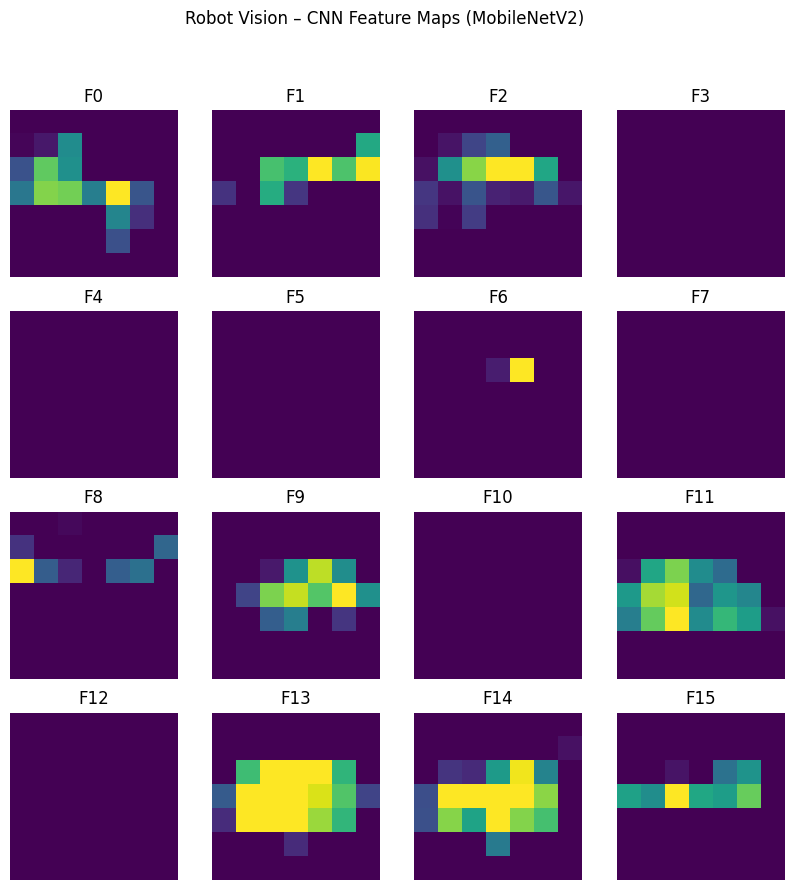

In [ ]:
# feature map 시각화 (로봇 비전 핵심 관찰 포인트)

num_features = 16  # 16장 프리뷰
plt.figure(figsize=(10,10))

for i in range(num_features):
    plt.subplot(4, 4, i+1)
    plt.imshow(feature_maps[0,:,:,i], cmap='viridis')
    plt.axis('off')
    plt.title(f"F{i}")

plt.suptitle("Robot Vision – CNN Feature Maps (MobileNetV2)")
plt.show()


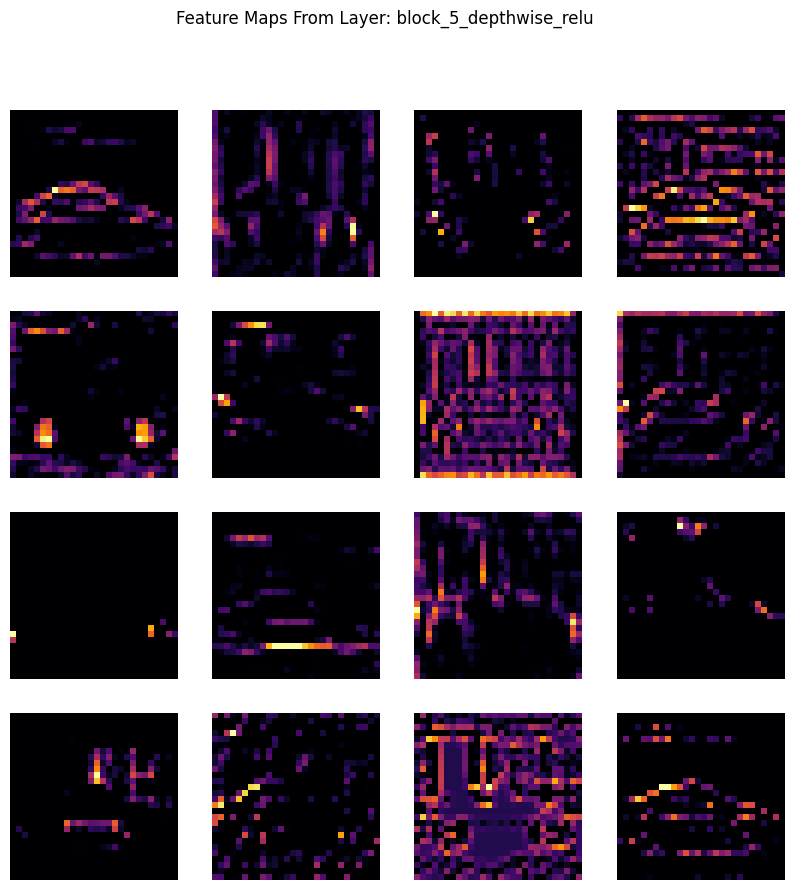

In [ ]:
# CNN의 “깊은 Layer” 특징맵 시각화 (추상적 특징)

layer_names = [layer.name for layer in base_model.layers]
selected_layer = base_model.get_layer(layer_names[50])

intermediate_model = tf.keras.Model(
    inputs=base_model.input,
    outputs=selected_layer.output
)

intermediate_output = intermediate_model(x)

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(intermediate_output[0,:,:,i], cmap='inferno')
    plt.axis('off')
plt.suptitle(f"Feature Maps From Layer: {selected_layer.name}")
plt.show()


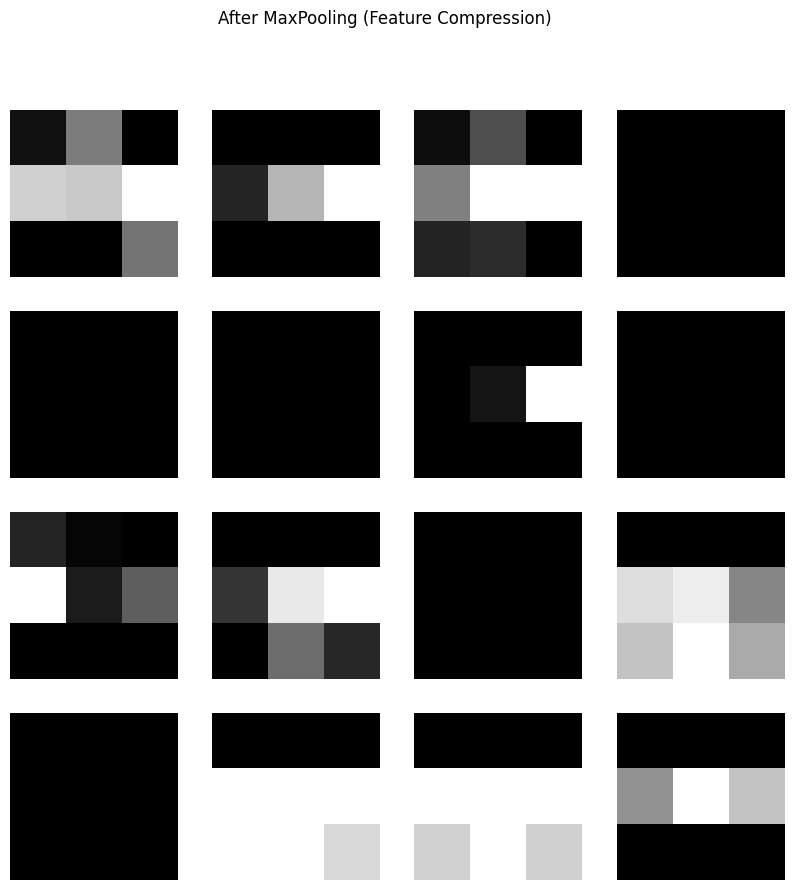

In [ ]:
# 풀링(Pooling) 동작 시각화 (공학적 해석)

from tensorflow.keras.layers import MaxPooling2D

pool = MaxPooling2D(pool_size=(2,2))
pooled_maps = pool(feature_maps)

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(pooled_maps[0,:,:,i], cmap='gray')
    plt.axis('off')
plt.suptitle("After MaxPooling (Feature Compression)")
plt.show()
